# Tabular on Lesson 8

## Tabular
The collaborative filtering problem we will be doing is one we have done before in lesson 8. But, what if try doing it using a tabular model. Note: We learned tabular modeling in lesson 9!

In [1]:
#hide
#!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *

In [12]:
from fastai.collab import *
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor

## Data
Lets grab the data, like before, and view it

In [3]:
path = untar_data(URLs.ML_100k)

ratings = pd.read_csv(path/'u.data', delimiter='\t', header=None,
                      names=['user','movie','rating','timestamp'])

ratings.head()

,user,movie,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


### Grabbing data
Let's initialize some variables we need to create our tabular object.

In [17]:
user_name = ratings.columns[0] #user col
item_name = ratings.columns[1] #movie col
rating_name = ratings.columns[2] #label (rating col)

cat_names = [user_name,item_name] #category col
splits = RandomSplitter()(range_of(ratings)) #split
procs = [Categorify, FillMissing, Normalize]

## Tabular Object
Lets now take everything above and create a tabular object.

In [ ]:
to = TabularCollab(ratings, procs, cat_names, y_names=[rating_name], y_block=TransformBlock(), splits=splits, reduce_memory=False)
dls = to.dataloaders()

In [18]:
dls.show_batch()

,user,movie,rating
0,614,476,3
1,582,676,2
2,792,124,4
3,733,762,4
4,344,815,2
5,36,269,3
6,110,779,3
7,752,302,5
8,409,214,4
9,916,50,5


## Training
Now let's find the best lr and train our model.

SuggestedLRs(lr_min=0.00831763744354248, lr_steep=0.0008317637839354575)

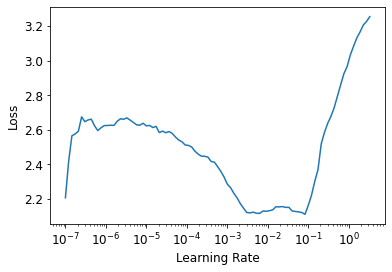

In [19]:
learn = tabular_learner(dls, y_range=(0,5.5), layers=[500,250],
                        n_out=1, loss_func=MSELossFlat())

learn.lr_find() #find best lr

In [20]:
learn.fit_one_cycle(4, 1e-3, wd=.01)

epoch,train_loss,valid_loss,time
0,0.973944,0.977132,00:12
1,0.875915,0.895781,00:12
2,0.807531,0.848947,00:12
3,0.727740,0.856915,00:12


> If you compare these results with lesson 8, you will notice they are similer.

## Random Forest
We can also create a random forest, which we also learned in lesson 9! 

In [9]:
#Functions will be using to calc error
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

**Method below creates our random forest and fits it**

In [14]:
def rf(xs, y, n_estimators=40, max_samples=80000, max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
                                max_samples=max_samples, max_features=max_features,
                                min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

### Tabular object
As we did above, lets create our tabular object.

In [6]:
procs = [Categorify, FillMissing]

to = TabularCollab(ratings, procs, cat_names, y_names=[rating_name], y_block=TransformBlock(), splits=splits, reduce_memory=False)

In [7]:
#Grab xs and y
xs,y = to.train.xs, to.train.y 
valid_xs,valid_y = to.valid.xs, to.valid.y

In [15]:
m = rf(xs, y) #Fitting

In [16]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)  

(0.848744, 1.004573)